In [20]:
import torch
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

matplotlib.rcParams["figure.dpi"] = 200
matplotlib.rcParams['font.family'] = 'sans-serif'
matplotlib.rcParams['font.sans-serif'] = ['Arial', 'Avenir', 'DejaVu Sans']

In [35]:
def plot_lines(x, ys):
    fig = plt.figure(figsize=(3, 2))
    for y in ys:
        plt.plot(x, y)
    plt.axhline(0, lw=0.5, color="gray", zorder=-1)
    plt.axvline(0, lw=0.5, color="gray", zorder=-1)
    plt.xlim(x.min(), x.max())
    plt.xticks(())
    ax = plt.gca()
    for s in ["left", "bottom"]:
        ax.spines[s].set_position(("data", 0))
    for s in ["top", "right"]:
        ax.spines[s].set_visible(False)
    ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
    ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)
    plt.tight_layout(pad=0)

def plot_logistic(x, ys):
    plt.figure(figsize=(3, 2))
    for y in ys.softmax(0):
        plt.plot(x, y * 100)
    plt.xlim(x.min(), x.max())
    plt.ylim(0, 1)
    plt.xticks(())
    plt.yticks((0.0, 50.0, 100.0))
    plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
    plt.tight_layout(pad=0)

    
def plot_flow(x, ys):
    plt.figure(figsize=(3, 2))
    ys = ys.softmax(0).cumsum(0)
    ys = torch.cat([torch.zeros_like(ys[:1]), ys], 0)
    for lb, ub in zip(ys[:-1], ys[1:]):
        plt.fill_between(x, lb * 100, ub * 100)
    plt.xlim(x.min(), x.max())
    plt.ylim(0, 1)
    plt.xticks(())
    plt.yticks((0.0, 50.0, 100.0))
    plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
    plt.tight_layout(pad=0)

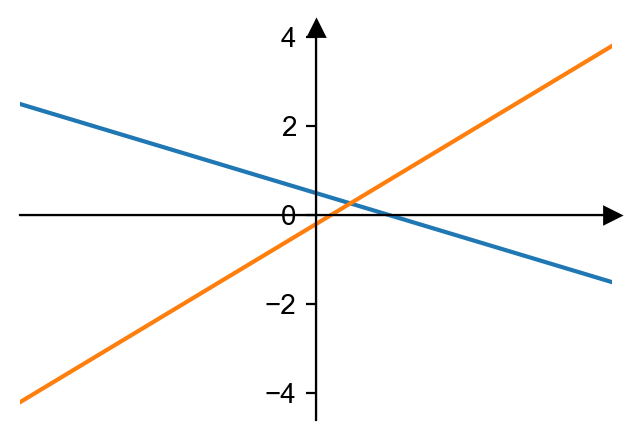

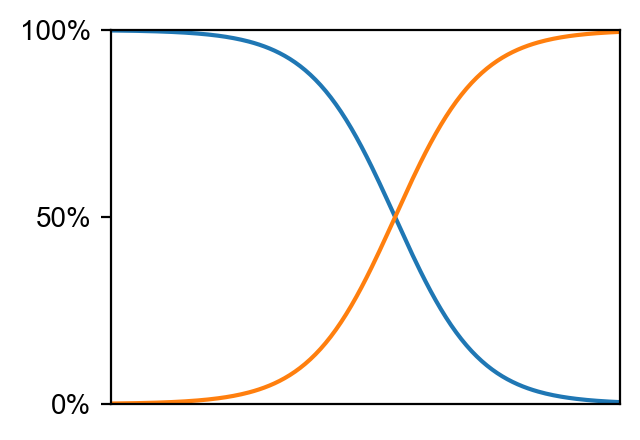

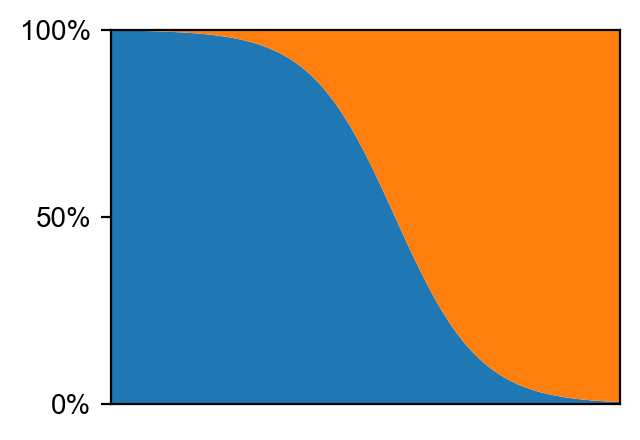

In [36]:
x = torch.linspace(-10.0, 10.0, 200)
ys = torch.stack([
    -0.2 * x + 0.5,
    0.4 * x -0.2,
])

plot_lines(x, ys)
plot_logistic(x, ys)
plot_flow(x, ys)

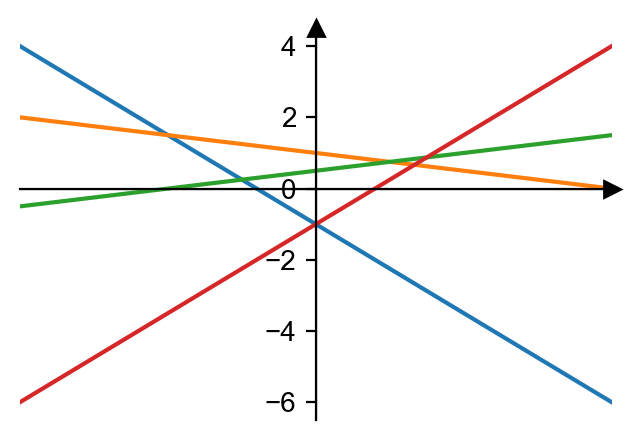

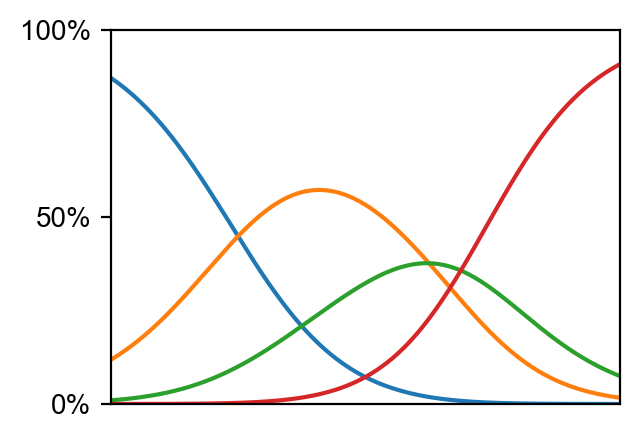

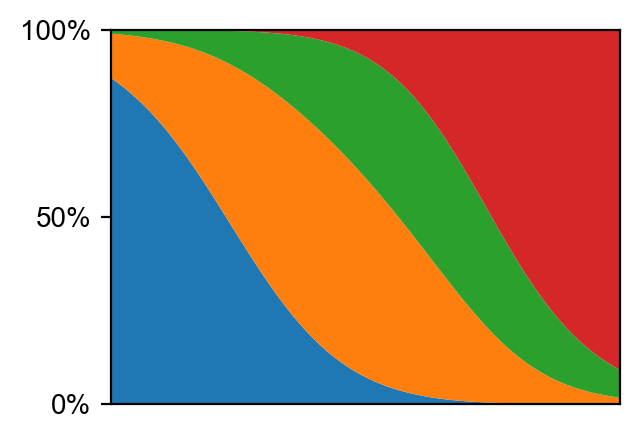

In [38]:
x = torch.linspace(-10.0, 10.0, 200)
ys = torch.stack([
    -0.5 * x - 1,
    -0.1 * x + 1,
    0.1 * x + 0.5,
    0.5 * x - 1,
])

plot_lines(x, ys)
plot_logistic(x, ys)
plot_flow(x, ys)